<html>
    <h1>ECE 445: Machine Learning for Engineers - Albert Tran</h1>
</html>

<html>
    <h2>Mini Jupyter Exercise #2</h2>
    <p><strong>Objective</strong>: The goal of this exercise is to explore various aspects of principal components analysis (PCA)
using both synthetic data and real data.</p>
    <h3>Synthetic Data</h3>
</html>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import matrix_rank
from mpl_toolkits import mplot3d

np.random.seed(53) #Same random numbers every time
A = np.random.normal(0,1,(3,2)) #Generate random 3x2 matrix with normal random entries
print("A:", A)
print("\nRank of Matrix A: ", matrix_rank(A))

A: [[ 0.20586487  1.16676171]
 [-2.07263978 -0.63268717]
 [ 0.99712645  2.3945538 ]]

Rank of Matrix A:  2


<html>
    <h4>Generation of Dataset #1</h4>
</html>

In [2]:
x = np.zeros((500,3,1))
np.random.seed(53)
for i in range(500):
    x[i] = np.matrix(A)*np.matrix(np.random.normal(0,1,(2,1))) #x=Av
x = np.matrix(np.transpose(x))
x.shape = (3,500)

print("Dimensionality of Data Matrix X:", x.shape)
print("Dimensionality of Data Sample X[i]:", x[:,0].shape)
print("Rank of X:", matrix_rank(x))

Dimensionality of Data Matrix X: (3, 500)
Dimensionality of Data Sample X[i]: (3, 1)
Rank of X: 2


<html>
    <h4>Singular Value and Eigenvalue Decomposition of Dataset #1</h4>
</html>

In [3]:
x_u, x_sigma, x_v = np.linalg.svd(x, full_matrices = True)#X=U(SIGMA)V
x_lambda, x_q = np.linalg.eig(x*np.matrix(np.transpose(x)))#X*X^T=Q(LAMBDA)Q^-1
print("Left Singular Vectors of X:\n",x_u)
print("Eigenvectors of X*X^T:\n",x_q)

Left Singular Vectors of X:
 [[-0.32929221 -0.35219682 -0.87608449]
 [ 0.53273339 -0.83535147  0.13558416]
 [-0.77959078 -0.42207265  0.46270174]]
Eigenvectors of X*X^T:
 [[-0.32929221  0.87608449  0.35219682]
 [ 0.53273339 -0.13558416  0.83535147]
 [-0.77959078 -0.46270174  0.42207265]]


The left singular vectors of X correspond to the eigenvectors of X*X^T, although some of the vectors have been reflected.

In [4]:
print("Squared Singluar Values of X:",np.square(x_sigma))
print("Eigenvalues of X*X^T:",x_lambda)

Squared Singluar Values of X: [5.53312162e+03 1.26668331e+03 8.09051082e-30]
Eigenvalues of X*X^T: [5.53312162e+03 2.54449239e-13 1.26668331e+03]


The squared singular values of X are the same as the eigenvalues of X*X^T, since the 2.54449239e-13 is very small but due to rounding is not zero, the corresponding squared singular value is even smaller but not zero as well.

In [5]:
print("Square of the Frobenius Norm of X:",np.square(np.linalg.norm(x)))
print("Sum of Squared Singular Values of X:",sum(np.square(x_sigma)))

Square of the Frobenius Norm of X: 6799.804931975367
Sum of Squared Singular Values of X: 6799.80493197537


The energy in X equal to the sum of squared singular values of X.

While none of the singluar values of X are zero, one of them is very small compared to the other singular values which implies that is should be zero, the reason it is not zero is because of the rounding error in python. Another reason is that SVD has an error since it is a low-rank approximation of X.

# The relationship between the left singular values of X that correspond to the 2 largest singular values and the columns of A is that they are linear combinations of each other. 

<html>
    <h4>PCA of Dataset #1</h4>
</html>

As discussed before, the rank of X is 2. This is because of the following theorem: <br><br>
$rank(AV)≤min(rank(A),rank(V))$ <br><br>
Therefore since the rank of A is 2 and the rank of V is also 2, the rank of X is 2. This means in the data matrix X (3x500), where each data sample is a column of X, one of the 3 rows is linearly dependent on the other two. This means PCA can reduce the number of rows needed from 3 to 2, since that information can be expressed by the other two rows.

Since the values of the matrix A and the matrix V were generated from a normal distrbution with an expected value of 0, X is a bivariate normal distribution with an expected value of 0.

In [6]:
print("Mean Vector of X:", x.mean(1))

Mean Vector of X: [[-0.05410283]
 [-0.02444551]
 [-0.09527569]]


The mean vector of X is shown to be small.

[[-24.49438635 -12.53485916]
 [ 39.6273493  -29.73057196]
 [-57.98982536 -15.02177445]]


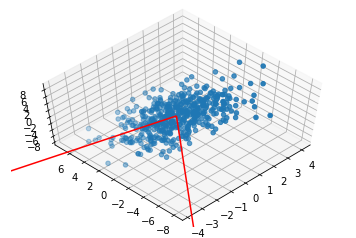

In [41]:
u = np.zeros((3,2))
s = np.zeros((2,2))
for i in range(3):
    u[i,0] = x_u[i,0]#First 2 singular vectors of U
    u[i,1] = x_u[i,1]
for i in range(2):
    s[i,i] = x_sigma[i]
w = np.matrix(u)*np.matrix(s)
print(w)
#print(np.transpose(u)*x)
ax = plt.axes(projection='3d')
ax.scatter3D(x[0],x[1],x[2])
ax.view_init(60, 225)

origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip([w[0,0],w[1,0],w[2,0]],[w[0,1],w[1,1],w[2,1]], origin)

ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.01,color='red')
plt.show()